In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from xgboost import XGBRegressor
from sklearn.neighbors import KNeighborsRegressor

In [3]:
df = pd.read_csv(r"C:\Users\prart\Downloads\india_housing_prices.csv")
df.head()

,ID,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,1,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,2,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,3,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,4,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,5,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [4]:
print(df.head())
df = df.drop(columns=["ID"], errors="ignore")

   ID        State      City      Locality      Property_Type  BHK  \
0   1   Tamil Nadu   Chennai   Locality_84          Apartment    1   
1   2  Maharashtra      Pune  Locality_490  Independent House    3   
2   3       Punjab  Ludhiana  Locality_167          Apartment    2   
3   4    Rajasthan   Jodhpur  Locality_393  Independent House    2   
4   5    Rajasthan    Jaipur  Locality_466              Villa    4   

   Size_in_SqFt  Price_in_Lakhs  Price_per_SqFt  Year_Built  ...  \
0          4740          489.76            0.10        1990  ...   
1          2364          195.52            0.08        2008  ...   
2          3642          183.79            0.05        1997  ...   
3          2741          300.29            0.11        1991  ...   
4          4823          182.90            0.04        2002  ...   

  Age_of_Property  Nearby_Schools  Nearby_Hospitals  \
0              35              10                 3   
1              17               8                 1   
2    

In [5]:
df.head()

,State,City,Locality,Property_Type,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Furnished_Status,...,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Public_Transport_Accessibility,Parking_Space,Security,Amenities,Facing,Owner_Type,Availability_Status
0,Tamil Nadu,Chennai,Locality_84,Apartment,1,4740,489.76,0.10,1990,Furnished,...,35,10,3,High,No,No,"Playground, Gym, Garden, Pool, Clubhouse",West,Owner,Ready_to_Move
1,Maharashtra,Pune,Locality_490,Independent House,3,2364,195.52,0.08,2008,Unfurnished,...,17,8,1,Low,No,Yes,"Playground, Clubhouse, Pool, Gym, Garden",North,Builder,Under_Construction
2,Punjab,Ludhiana,Locality_167,Apartment,2,3642,183.79,0.05,1997,Semi-furnished,...,28,9,8,Low,Yes,No,"Clubhouse, Pool, Playground, Gym",South,Broker,Ready_to_Move
3,Rajasthan,Jodhpur,Locality_393,Independent House,2,2741,300.29,0.11,1991,Furnished,...,34,5,7,High,Yes,Yes,"Playground, Clubhouse, Gym, Pool, Garden",North,Builder,Ready_to_Move
4,Rajasthan,Jaipur,Locality_466,Villa,4,4823,182.90,0.04,2002,Semi-furnished,...,23,4,9,Low,No,Yes,"Playground, Garden, Gym, Pool, Clubhouse",East,Builder,Ready_to_Move


In [6]:
df.describe()

,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals
count,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000,250000.000000
mean,2.999396,2749.813216,254.586854,0.130597,2006.520012,14.966800,15.503004,18.479988,5.499860,5.498016
std,1.415521,1300.606954,141.349921,0.130747,9.808575,8.948047,8.671618,9.808575,2.878639,2.871860
min,1.000000,500.000000,10.000000,0.000000,1990.000000,0.000000,1.000000,2.000000,1.000000,1.000000
25%,2.000000,1623.000000,132.550000,0.050000,1998.000000,7.000000,8.000000,10.000000,3.000000,3.000000
50%,3.000000,2747.000000,253.870000,0.090000,2007.000000,15.000000,15.000000,18.000000,5.000000,5.000000
75%,4.000000,3874.000000,376.880000,0.160000,2015.000000,23.000000,23.000000,27.000000,8.000000,8.000000
max,5.000000,5000.000000,500.000000,0.990000,2023.000000,30.000000,30.000000,35.000000,10.000000,10.000000


In [7]:
df.isnull().sum()

State                             0
City                              0
Locality                          0
Property_Type                     0
BHK                               0
Size_in_SqFt                      0
Price_in_Lakhs                    0
Price_per_SqFt                    0
Year_Built                        0
Furnished_Status                  0
Floor_No                          0
Total_Floors                      0
Age_of_Property                   0
Nearby_Schools                    0
Nearby_Hospitals                  0
Public_Transport_Accessibility    0
Parking_Space                     0
Security                          0
Amenities                         0
Facing                            0
Owner_Type                        0
Availability_Status               0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 22 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   State                           250000 non-null  object 
 1   City                            250000 non-null  object 
 2   Locality                        250000 non-null  object 
 3   Property_Type                   250000 non-null  object 
 4   BHK                             250000 non-null  int64  
 5   Size_in_SqFt                    250000 non-null  int64  
 6   Price_in_Lakhs                  250000 non-null  float64
 7   Price_per_SqFt                  250000 non-null  float64
 8   Year_Built                      250000 non-null  int64  
 9   Furnished_Status                250000 non-null  object 
 10  Floor_No                        250000 non-null  int64  
 11  Total_Floors                    250000 non-null  int64  
 12  Age_of_Property 

C:\Users\prart\AppData\Local\Temp\ipykernel_10472\194186323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)


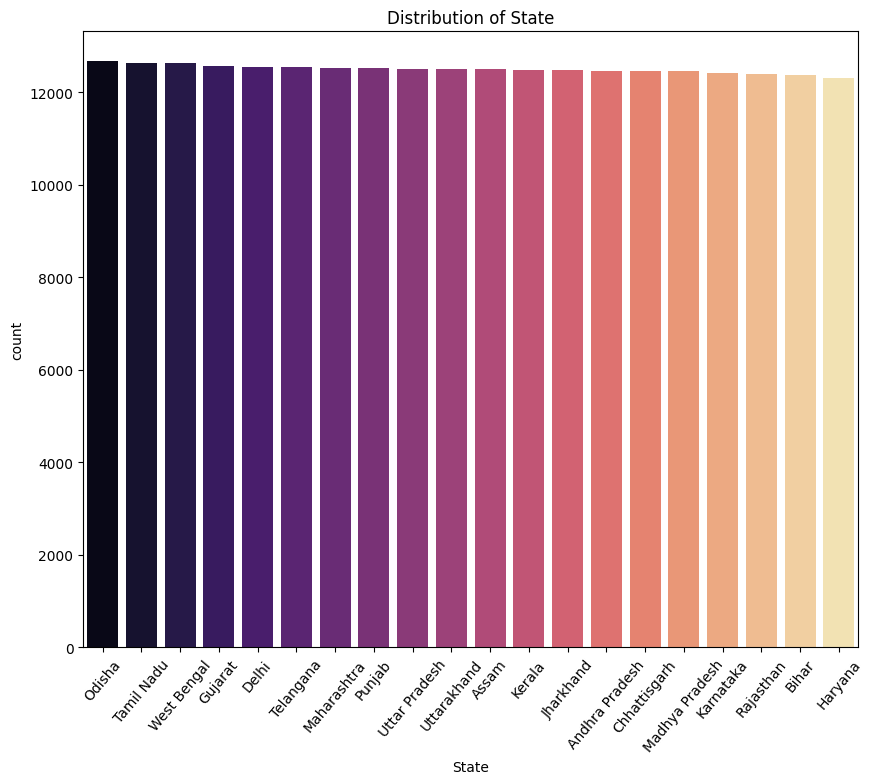

C:\Users\prart\AppData\Local\Temp\ipykernel_10472\194186323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)


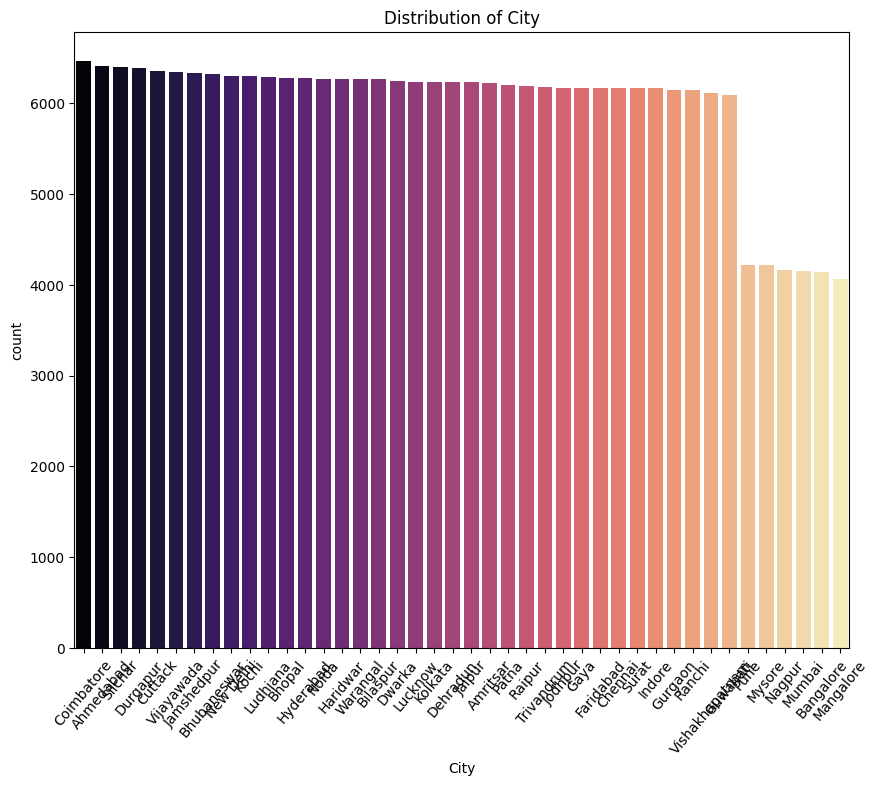

C:\Users\prart\AppData\Local\Temp\ipykernel_10472\194186323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)


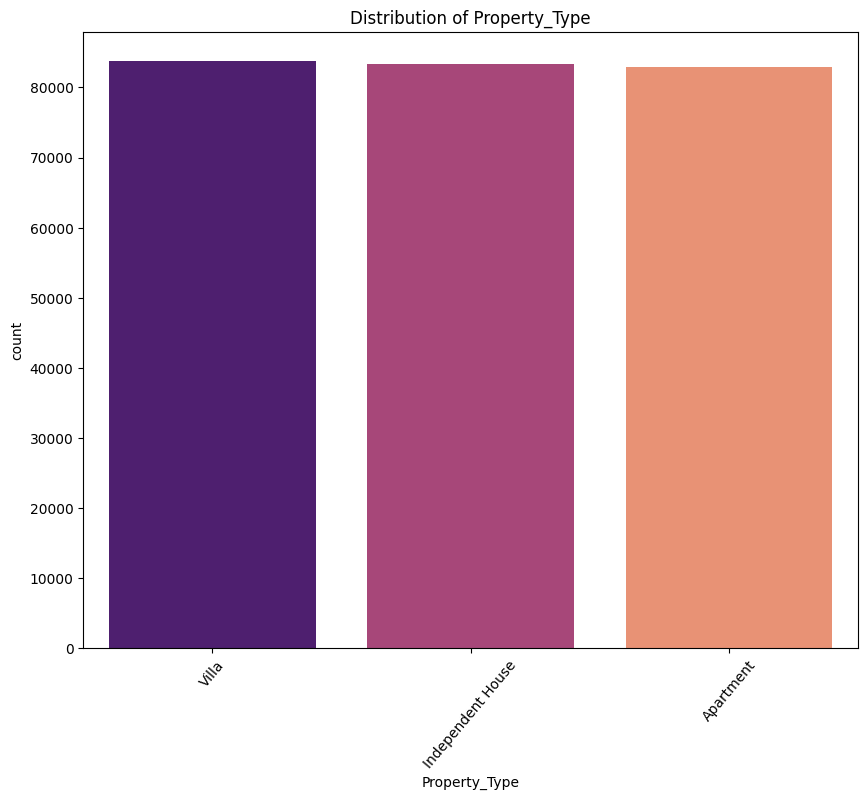

C:\Users\prart\AppData\Local\Temp\ipykernel_10472\194186323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)


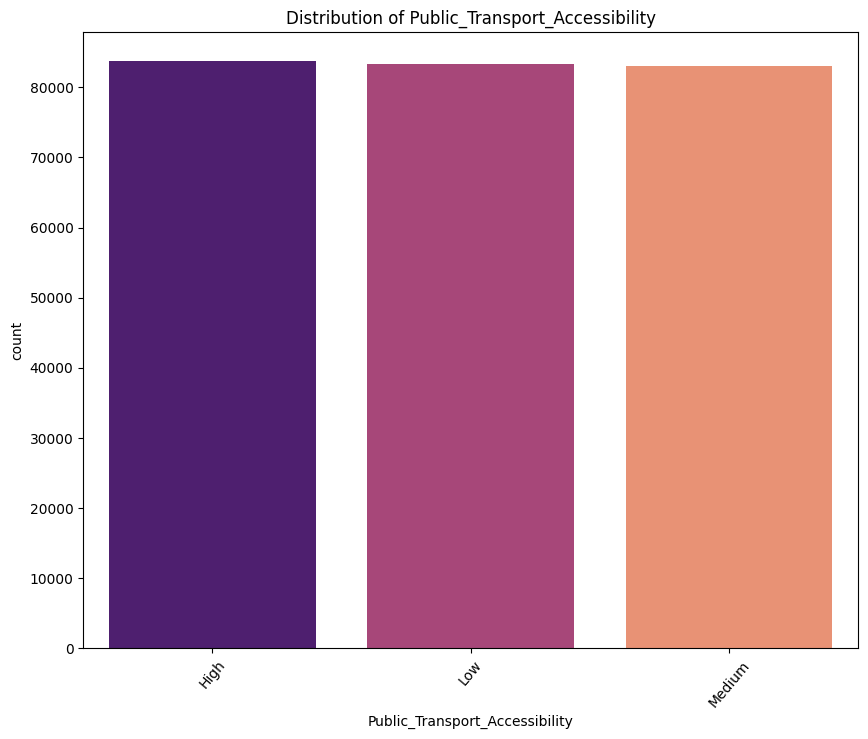

C:\Users\prart\AppData\Local\Temp\ipykernel_10472\194186323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)


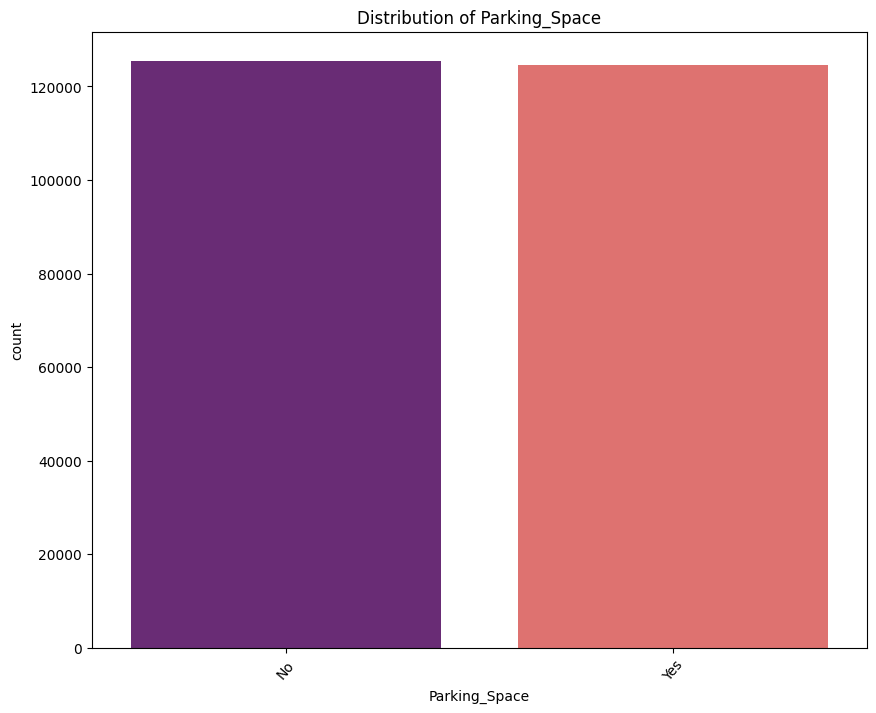

C:\Users\prart\AppData\Local\Temp\ipykernel_10472\194186323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)


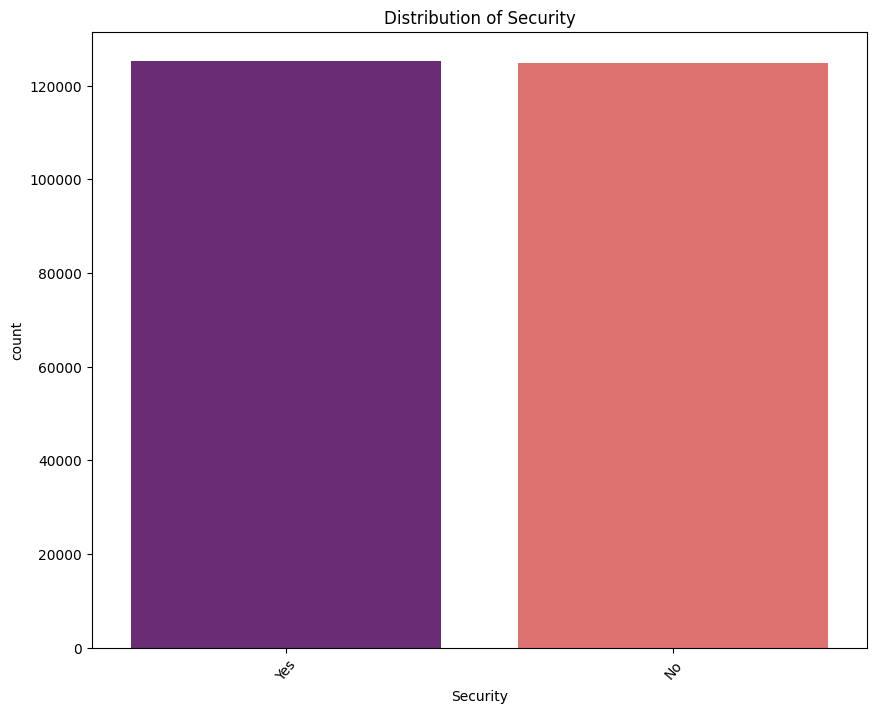

C:\Users\prart\AppData\Local\Temp\ipykernel_10472\194186323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)


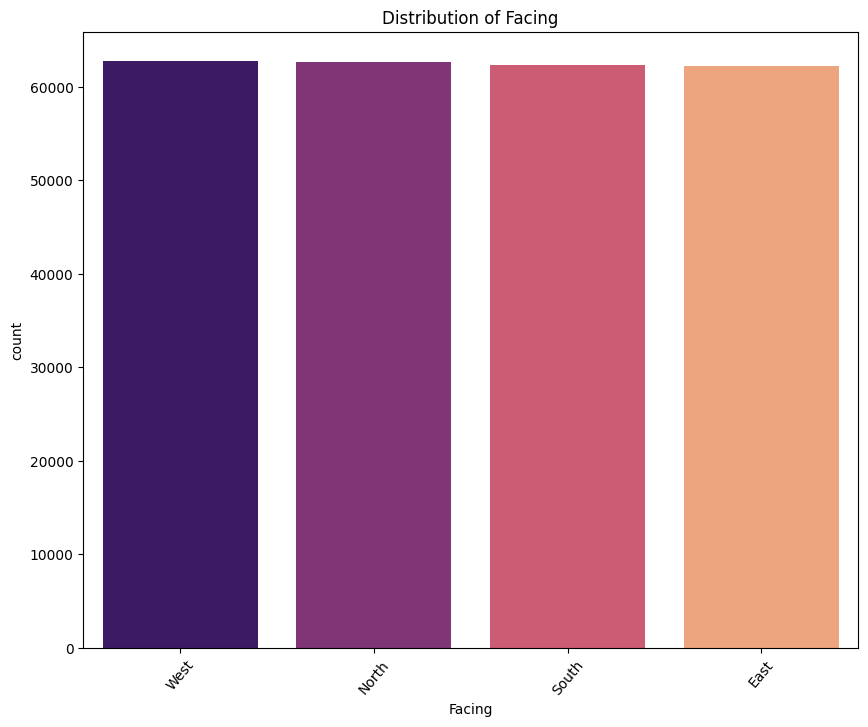

C:\Users\prart\AppData\Local\Temp\ipykernel_10472\194186323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)


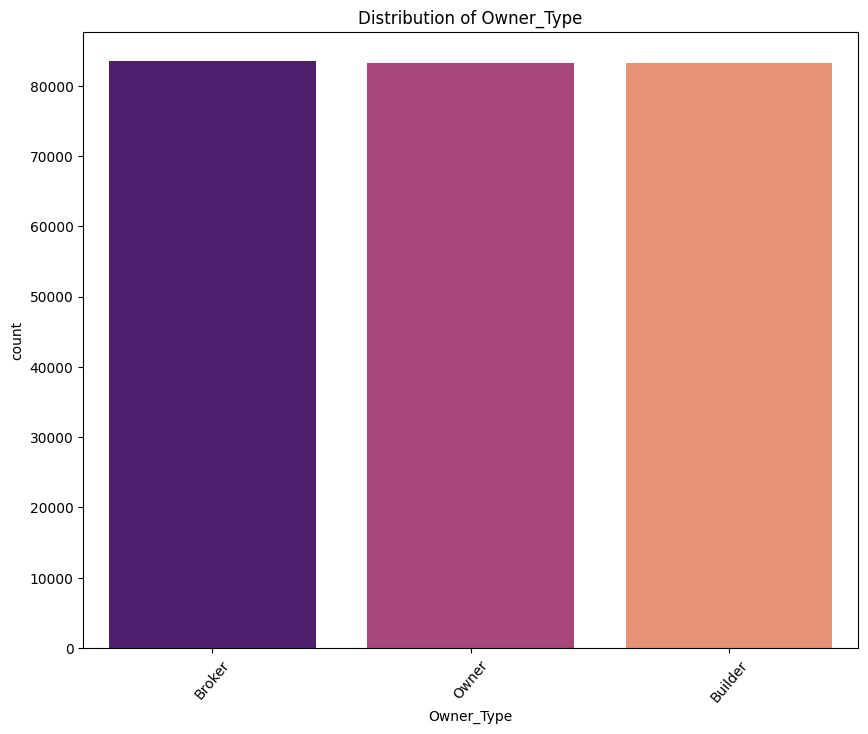

C:\Users\prart\AppData\Local\Temp\ipykernel_10472\194186323.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)


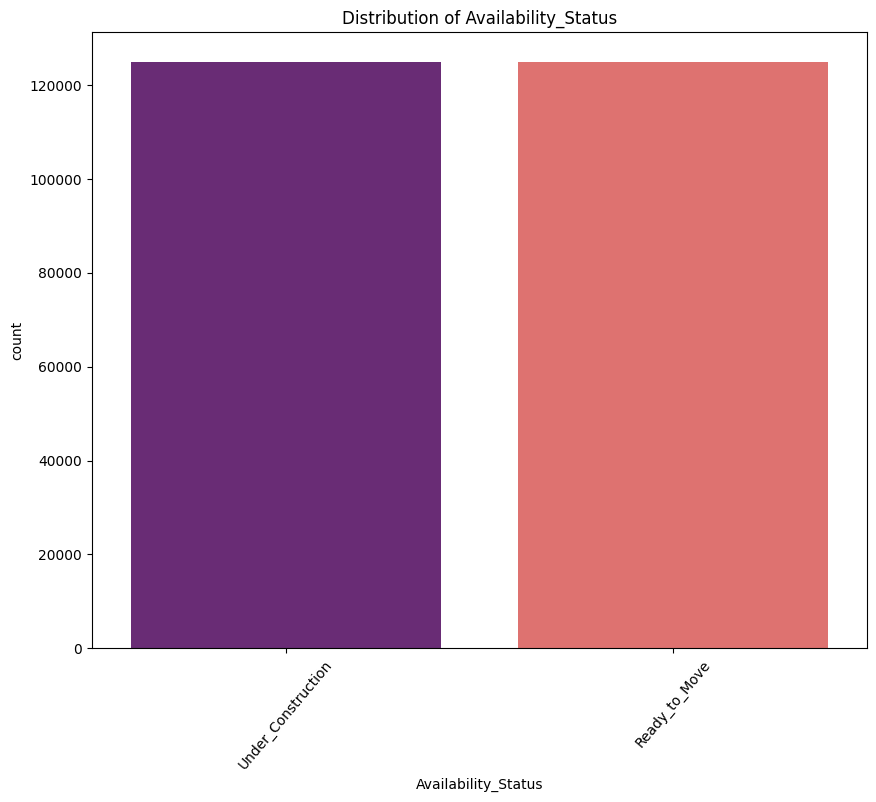

In [9]:
categorical_cols=['State','City','Property_Type','Public_Transport_Accessibility',
       'Parking_Space', 'Security', 'Facing', 'Owner_Type',
       'Availability_Status']
for cols in categorical_cols:
    plt.figure(figsize=(10,8))
    sns.countplot(data=df,x=cols,palette='magma',order=df[cols].value_counts().index)
    plt.title(f'Distribution of {cols}')
    plt.xticks(rotation=50)
    plt.show()

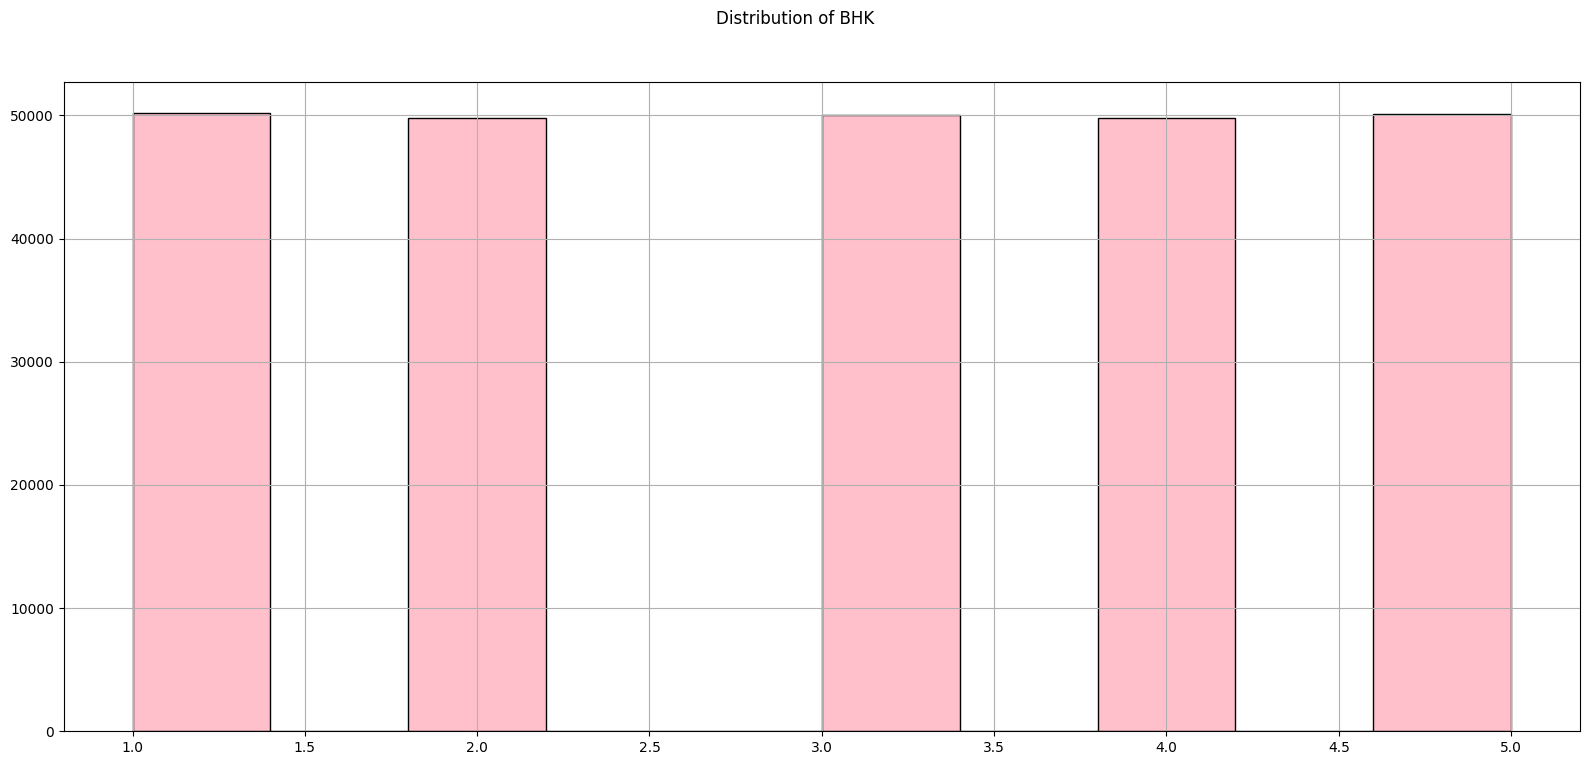

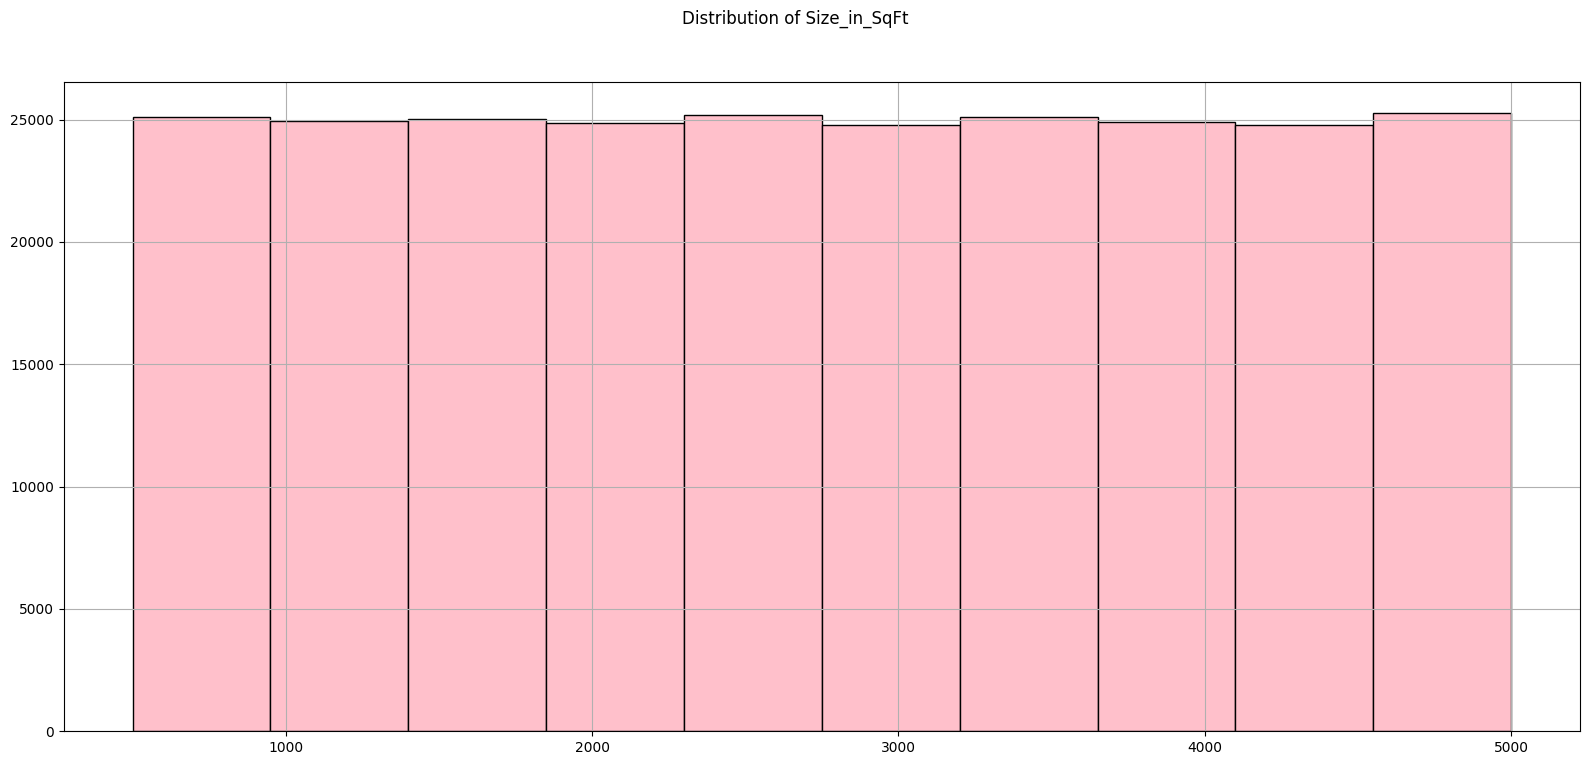

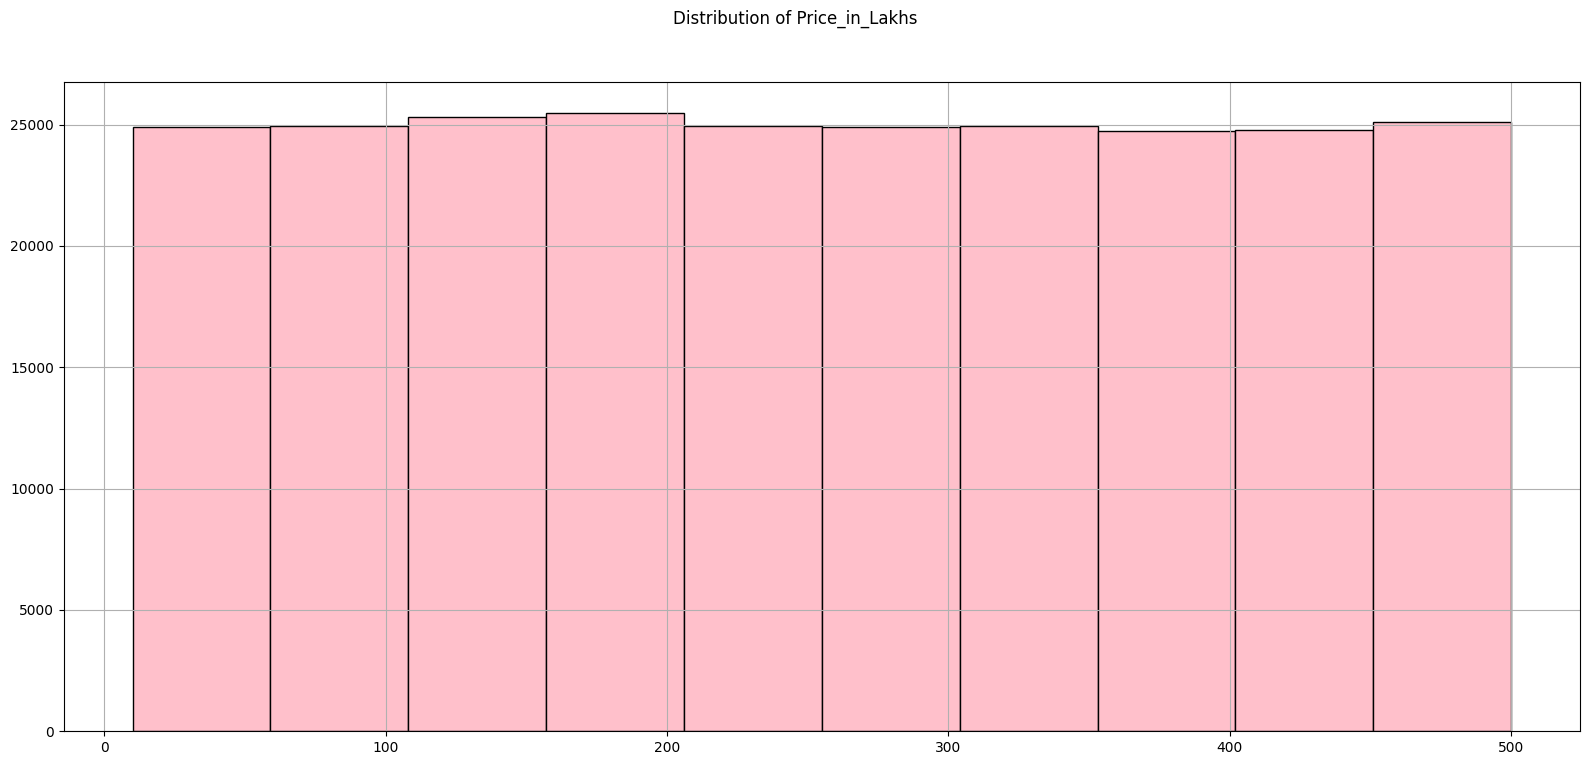

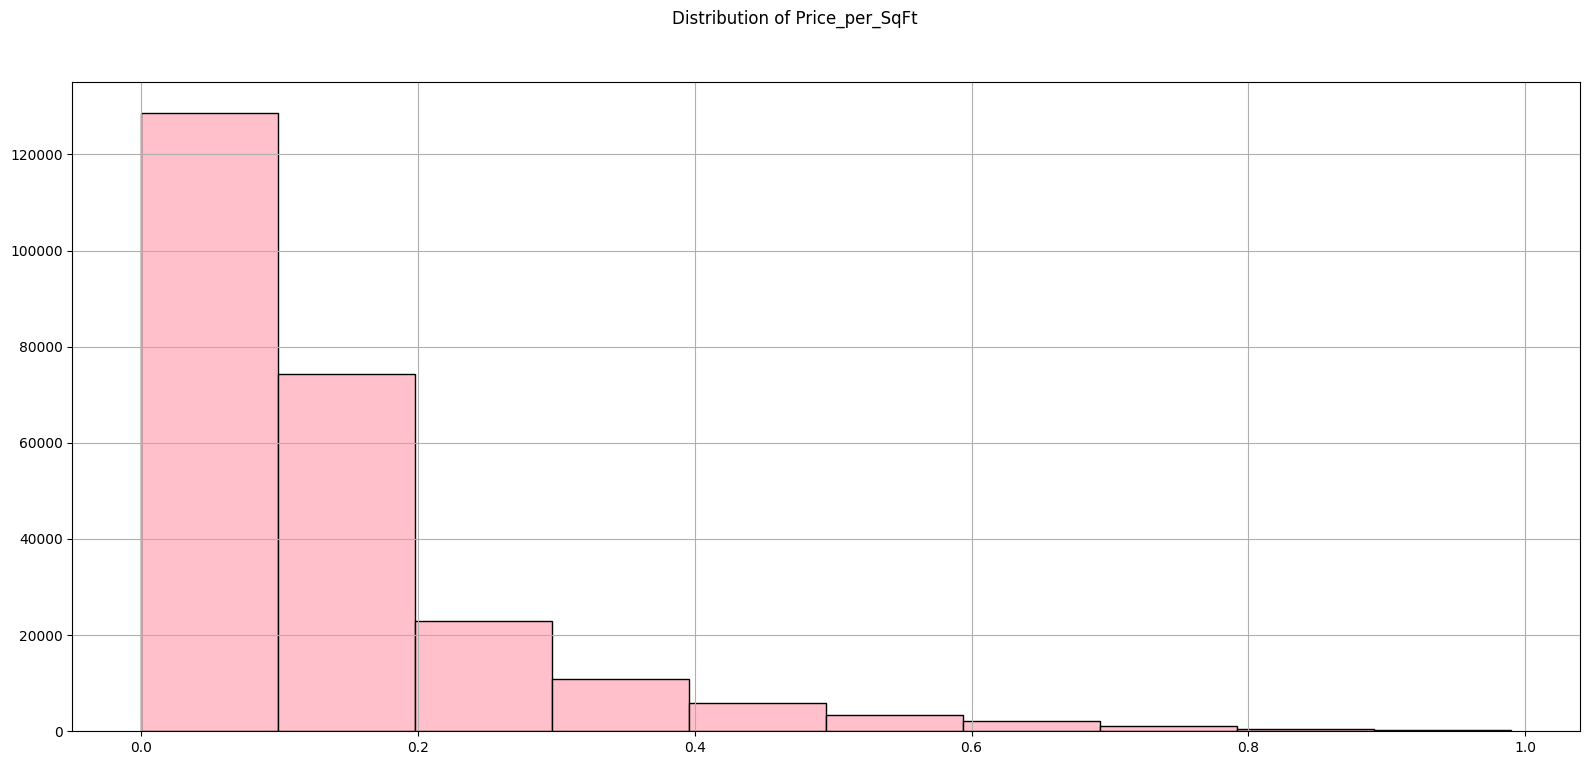

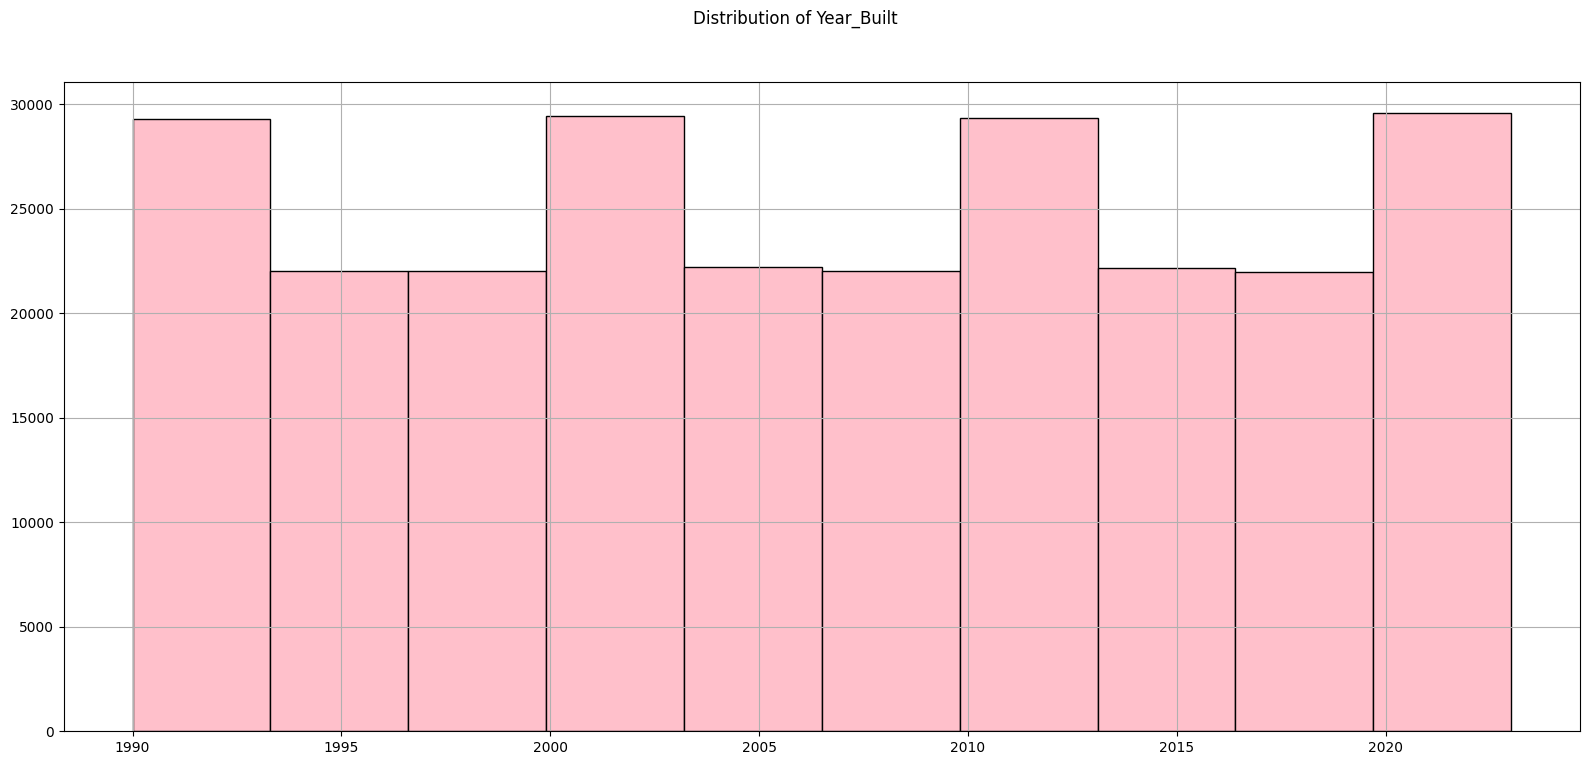

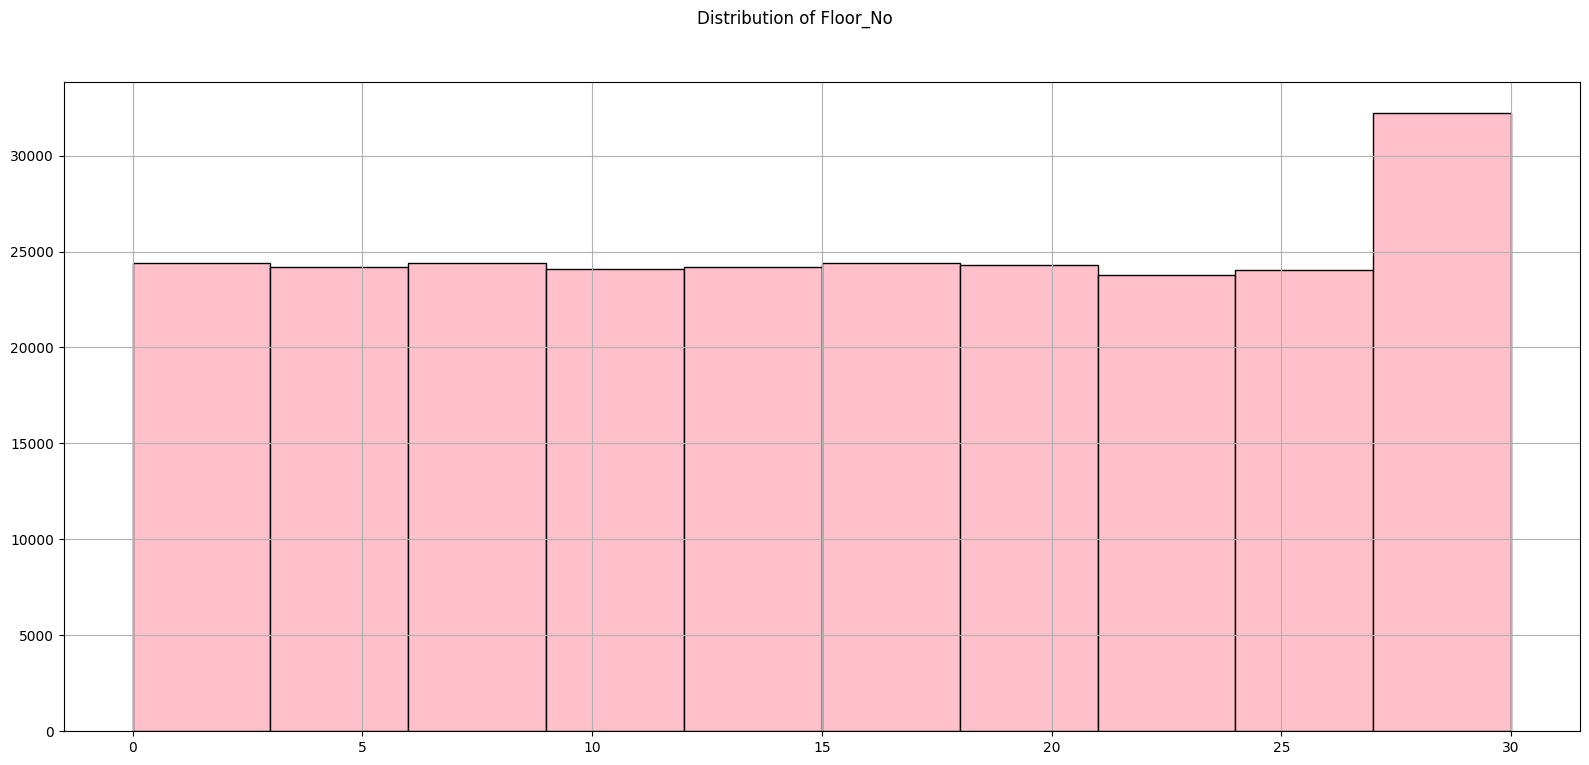

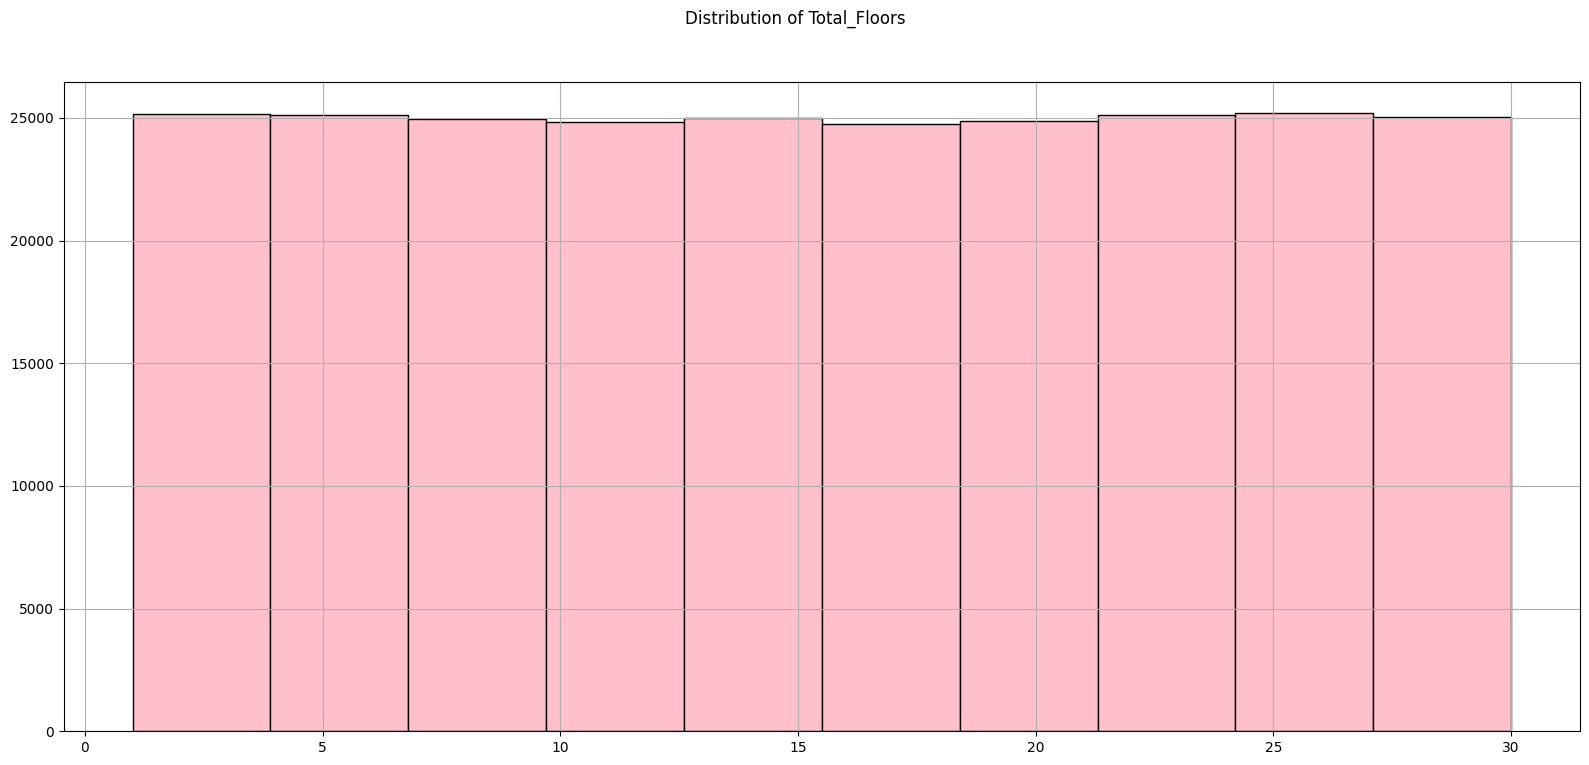

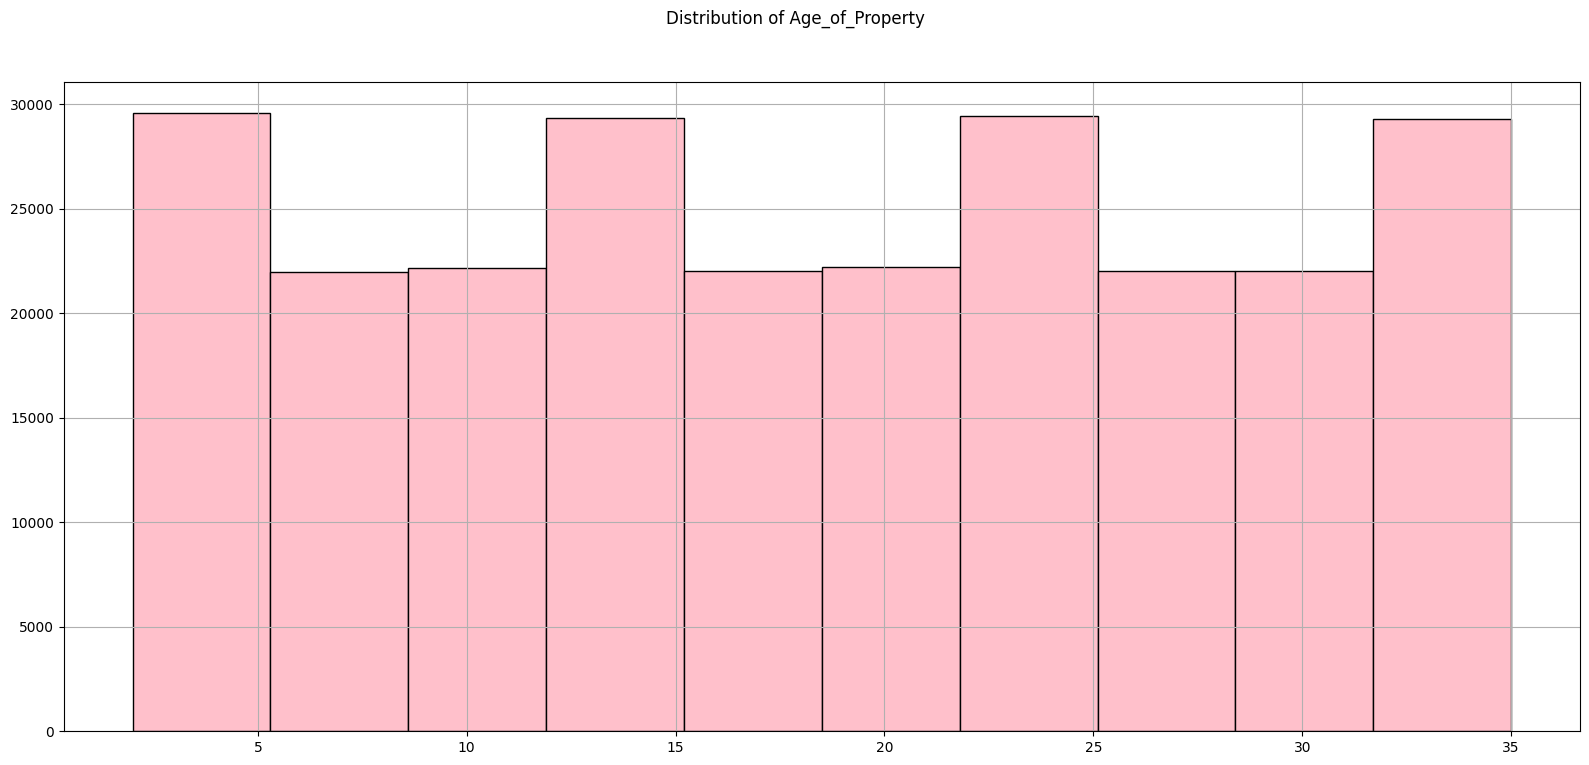

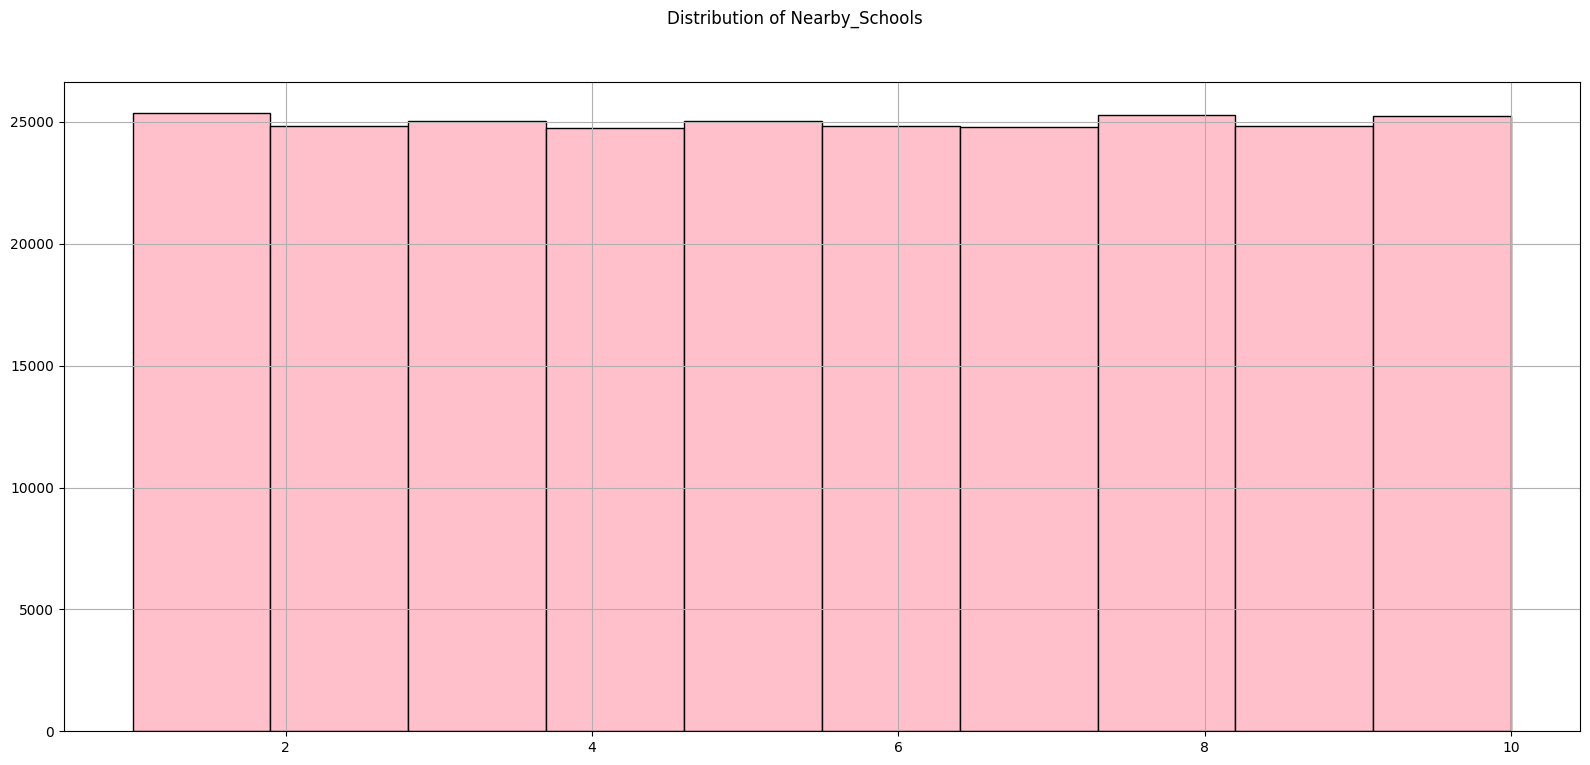

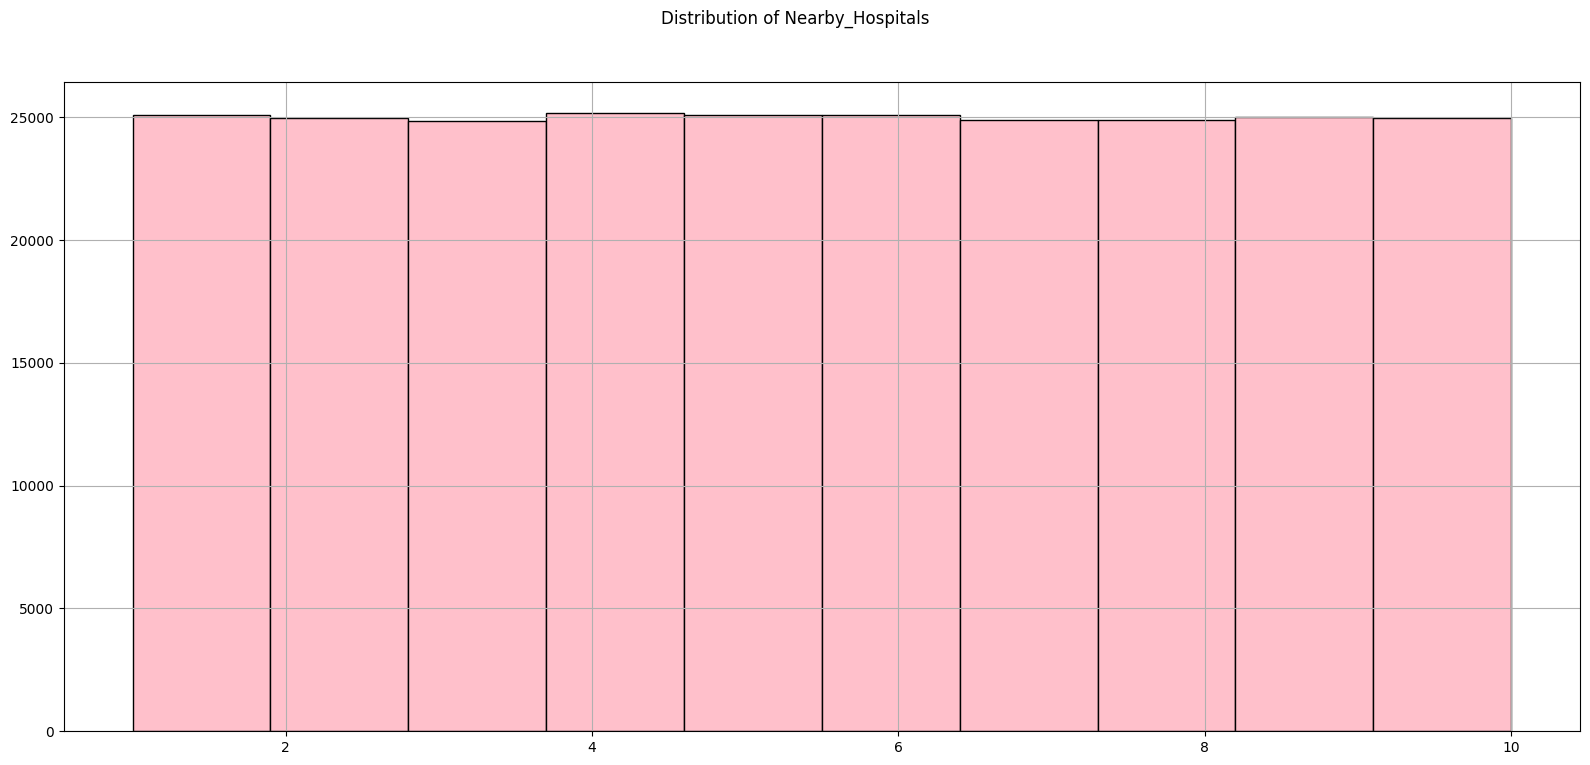

In [10]:
numerical_cols=['BHK', 'Size_in_SqFt', 'Price_in_Lakhs', 'Price_per_SqFt', 'Year_Built','Floor_No', 'Total_Floors', 'Age_of_Property','Nearby_Schools', 'Nearby_Hospitals']
for cols in numerical_cols:
    plt.figure(figsize=(12,8))
    df[cols].hist(figsize=(16,8),bins=10,color='pink',edgecolor='black')
    plt.suptitle(f'Distribution of {cols}')
    plt.tight_layout(rect=[0, 0.03, 1, 0.95])
    plt.show()

<Axes: >

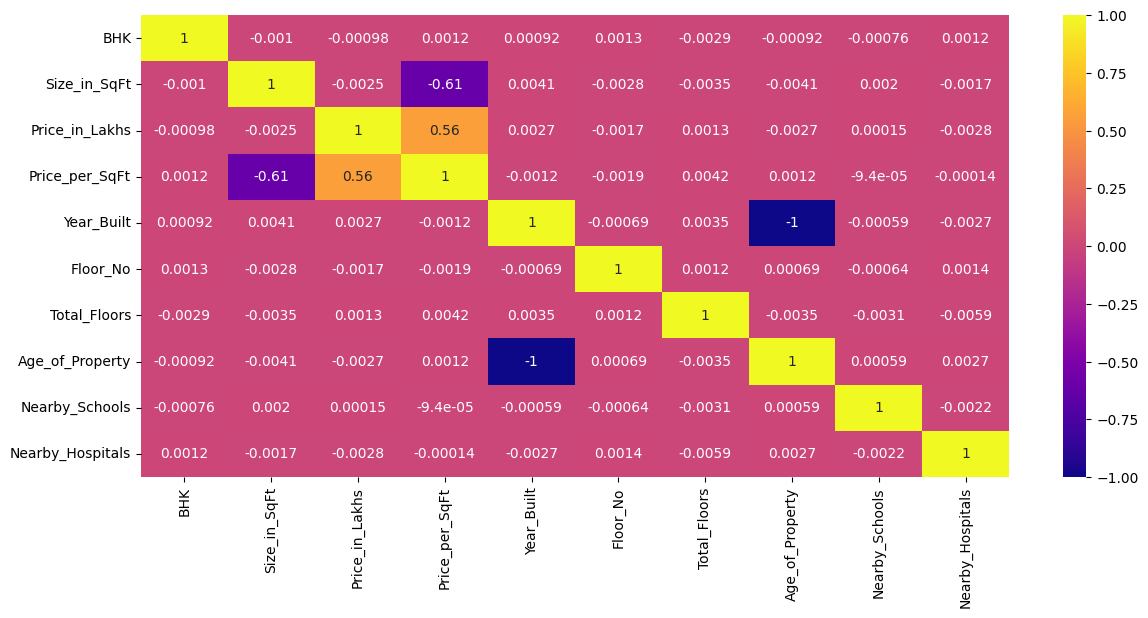

In [11]:
plt.figure(figsize=(14,6))
sns.heatmap(df.corr(numeric_only=True),cmap='plasma',annot=True)

In [12]:
df.drop(columns=["Locality","Public_Transport_Accessibility","Amenities","Furnished_Status","City","Facing","Property_Type"],inplace=True)

In [13]:
df["Parking_Space"] = df["Parking_Space"].map({"Yes": 1, "No": 0})
df["Security"] = df["Security"].map({"Yes": 1, "No": 0})

In [14]:
df.head()

,State,BHK,Size_in_SqFt,Price_in_Lakhs,Price_per_SqFt,Year_Built,Floor_No,Total_Floors,Age_of_Property,Nearby_Schools,Nearby_Hospitals,Parking_Space,Security,Owner_Type,Availability_Status
0,Tamil Nadu,1,4740,489.76,0.10,1990,22,1,35,10,3,0,0,Owner,Ready_to_Move
1,Maharashtra,3,2364,195.52,0.08,2008,21,20,17,8,1,0,1,Builder,Under_Construction
2,Punjab,2,3642,183.79,0.05,1997,19,27,28,9,8,1,0,Broker,Ready_to_Move
3,Rajasthan,2,2741,300.29,0.11,1991,21,26,34,5,7,1,1,Builder,Ready_to_Move
4,Rajasthan,4,4823,182.90,0.04,2002,3,2,23,4,9,0,1,Builder,Ready_to_Move


In [15]:
df = pd.get_dummies(df, columns=[ "Owner_Type", "Availability_Status","State"], drop_first=True)

In [16]:
X = df.drop(columns=["Price_in_Lakhs"], errors="ignore")
y = df["Price_in_Lakhs"]

In [17]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 250000 entries, 0 to 249999
Data columns (total 33 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   BHK                                     250000 non-null  int64  
 1   Size_in_SqFt                            250000 non-null  int64  
 2   Price_per_SqFt                          250000 non-null  float64
 3   Year_Built                              250000 non-null  int64  
 4   Floor_No                                250000 non-null  int64  
 5   Total_Floors                            250000 non-null  int64  
 6   Age_of_Property                         250000 non-null  int64  
 7   Nearby_Schools                          250000 non-null  int64  
 8   Nearby_Hospitals                        250000 non-null  int64  
 9   Parking_Space                           250000 non-null  int64  
 10  Security                                2500

In [18]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [19]:
rf=RandomForestRegressor()

In [20]:
rf.fit(X,y)

RandomForestRegressor()

In [21]:
def evaluate_model(y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    r2 = r2_score(y_true, y_pred)
    print(f"\n{model_name} Performance:")
    print(f"RMSE: {rmse:.2f}")
    print(f"R² Score: {r2:.2f}")
    

In [22]:
rf_preds=rf.predict(X_test)

In [23]:
evaluate_model(y_test, rf_preds, "Random Forest")


Random Forest Performance:
RMSE: 3.33
R² Score: 1.00


In [24]:
accuracy = r2_score(y_test,rf_preds)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.94%


In [25]:
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)

LinearRegression()

In [26]:
lr_preds = lr_model.predict(X_test)

In [27]:
evaluate_model(y_test, lr_preds, "Linear Regression")


Linear Regression Performance:
RMSE: 100.66
R² Score: 0.49


In [28]:
accuracy = r2_score(y_test,rf_preds)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.94%


In [29]:
xgb_model = XGBRegressor(objective='reg:squarederror', n_estimators=100,max_depth=2,learning_rate=0.2)
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.2, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=2,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=100,
             n_jobs=None, num_parallel_tree=None, ...)

In [30]:
xgb_preds = xgb_model.predict(X_test)

In [31]:
evaluate_model(y_test, xgb_preds, "XGBoost")


XGBoost Performance:
RMSE: 18.66
R² Score: 0.98


In [32]:
accuracy = r2_score(y_test,rf_preds)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.94%


In [33]:
knn = KNeighborsRegressor(n_neighbors=6)

In [34]:
knn.fit(X,y)

KNeighborsRegressor(n_neighbors=6)

In [35]:
knn_preds=knn.predict(X_test)

In [36]:
evaluate_model(y_test,knn_preds,"K nearest neigbhor")


K nearest neigbhor Performance:
RMSE: 127.74
R² Score: 0.18


In [37]:
accuracy = r2_score(y_test,rf_preds)
print("Accuracy: {:.2f}%".format(accuracy*100))

Accuracy: 99.94%


In [38]:
import joblib

In [40]:
joblib.dump(knn, "model.pkl")

['model.pkl']